In [63]:
import json
import glob
import pandas as pd
# http://localhost:8888/tree/
train_size, test_size, val_size = len(glob.glob('./Russian-military-annotated-4/train/*.jpg')), len(glob.glob('./Russian-military-annotated-4/test/*.jpg')), len(glob.glob('./Russian-military-annotated-4/valid/*.jpg'))

sum([train_size, test_size, val_size])

1042

In [39]:
json.loads(open(glob.glob('./Russian-military-annotated-4/train/*.json')[0]).read()).keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [40]:
len(json.loads(open(glob.glob('./Russian-military-annotated-4/train/*.json')[0]).read())["categories"])

# len(json.loads(open(glob.glob('./Russian-military-annotated-4/test/*.json')[0]).read())["categories"]), len(json.loads(open(glob.glob('./Russian-military-annotated-4/valid/*.json')[0]).read())["categories"])

11

Text(0, 0.5, 'Назва бойової техніки')

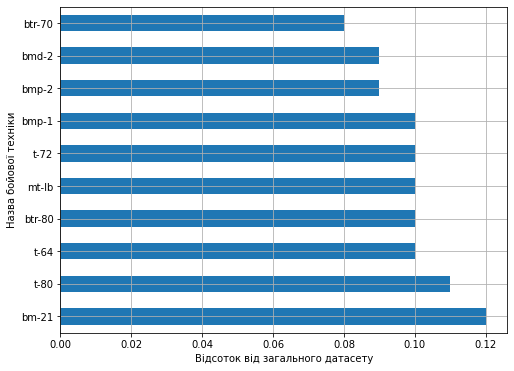

In [69]:
cat_d = json.loads(open(glob.glob('./Russian-military-annotated-4/train/*.json')[0]).read())["categories"]
anot = json.loads(open(glob.glob('./Russian-military-annotated-4/train/*.json')[0]).read())["annotations"]
anot_df = pd.DataFrame(anot)
anot_df["vehicle"] = anot_df.category_id.map({d["id"]: d["name"] for d in cat_d})
ax = (anot_df.vehicle.value_counts()/len(anot_df)).round(2).plot(kind="barh", grid=True, figsize=(8, 6))
# ax.set_title("Розподіл різного виду техніки у відсотках\nпри розмірі набору даних\n1042 точки")
ax.set_xlabel("Відсоток від загального датасету")
ax.set_ylabel("Назва бойової техніки")

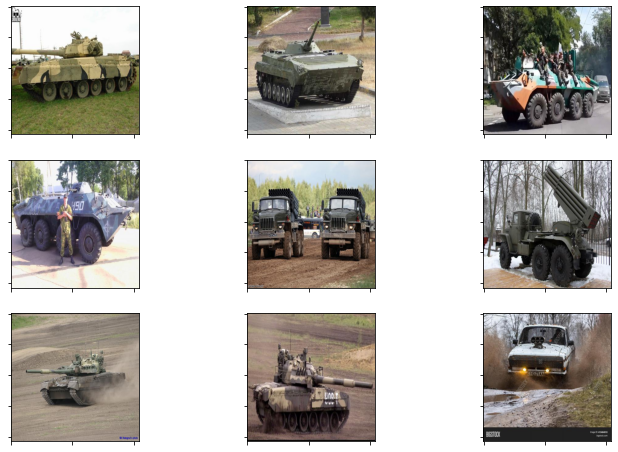

In [84]:
from PIL import Image
import matplotlib.pyplot as plt
# Image.open(glob.glob('./Russian-military-annotated-4/train/*.jpg')[5])
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
imgs = glob.glob('./Russian-military-annotated-4/train/*.jpg')
axes[0][0].imshow(plt.imread(imgs[5]))
axes[0][1].imshow(plt.imread(imgs[8]))
axes[0][2].imshow(plt.imread(imgs[100]))
axes[1][0].imshow(plt.imread(imgs[200]))
axes[1][1].imshow(plt.imread(imgs[300]))
axes[1][2].imshow(plt.imread(imgs[400]))
axes[2][0].imshow(plt.imread(imgs[500]))
axes[2][1].imshow(plt.imread(imgs[800]))
axes[2][2].imshow(plt.imread(imgs[1000]))
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='both', labelbottom=False, labelleft=False)

In [50]:
anot_df.category.nunique()

10

In [49]:
anot_df.category.value_counts()

bm-21     155
t-80      136
t-64      131
btr-80    130
mt-lb     125
t-72      124
bmp-1     121
bmp-2     115
bmd-2     114
btr-70    103
Name: category, dtype: int64